In [25]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dfset
file_path = '/Users/ayusharyakashyap/Desktop/Semester 5/Data Visualization/A1 Project/Filtered CSV/world_bank_development_indicators_with_gdp_per_capita.csv'
df = pd.read_csv(file_path)

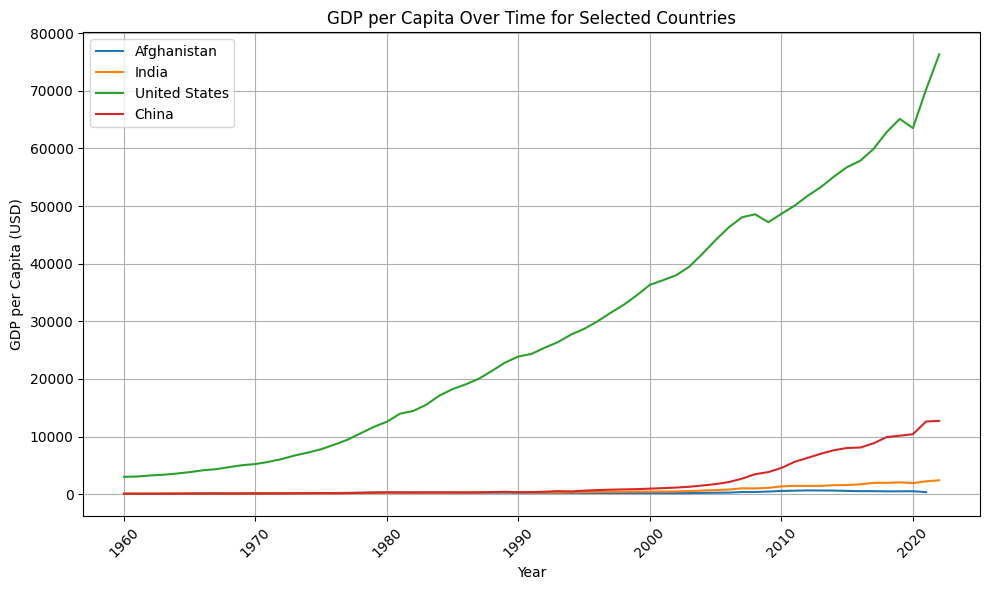

In [27]:
# Convert 'date' to datetime for proper time-series visualization
df['date'] = pd.to_datetime(df['date'])

# Select a few countries to visualize their GDP per capita trends
selected_countries = ['Afghanistan', 'India', 'United States', 'China']

# Filter the dfframe for the selected countries
gdp_df = df[df['country'].isin(selected_countries)][['country', 'date', 'GDP per capita']].dropna()

# Plot the df
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_df = gdp_df[gdp_df['country'] == country]
    plt.plot(country_df['date'], country_df['GDP per capita'], label=country)

# Add labels and title
plt.title('GDP per Capita Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


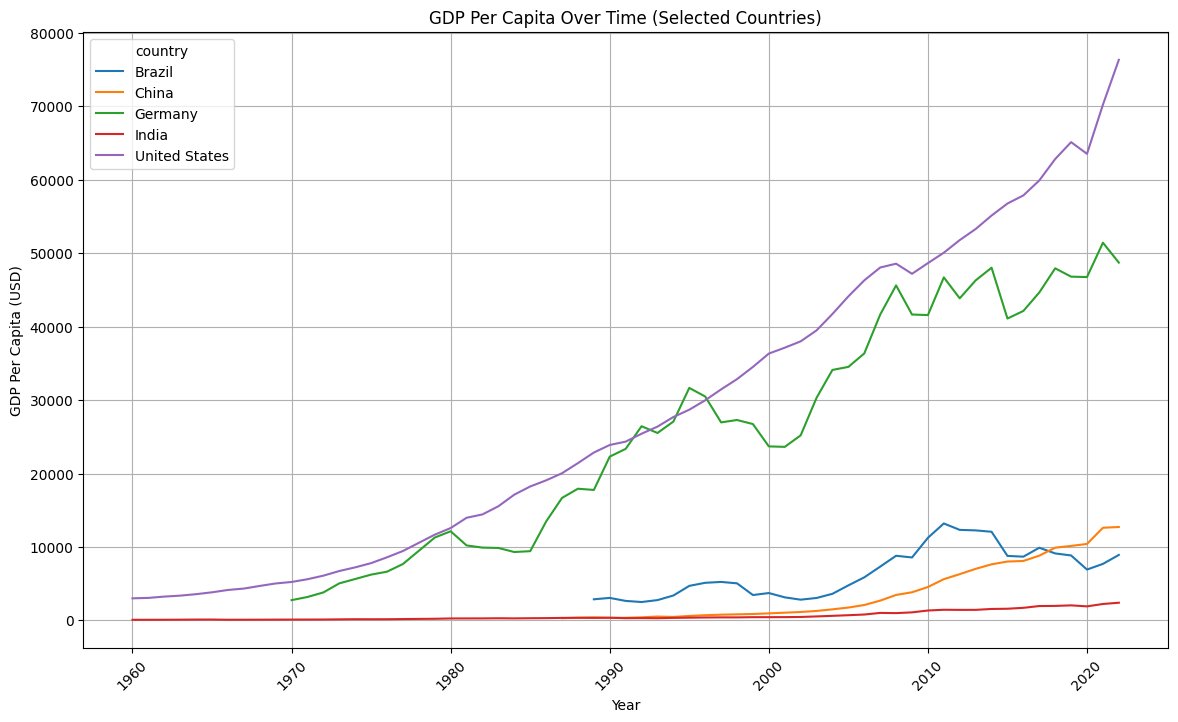

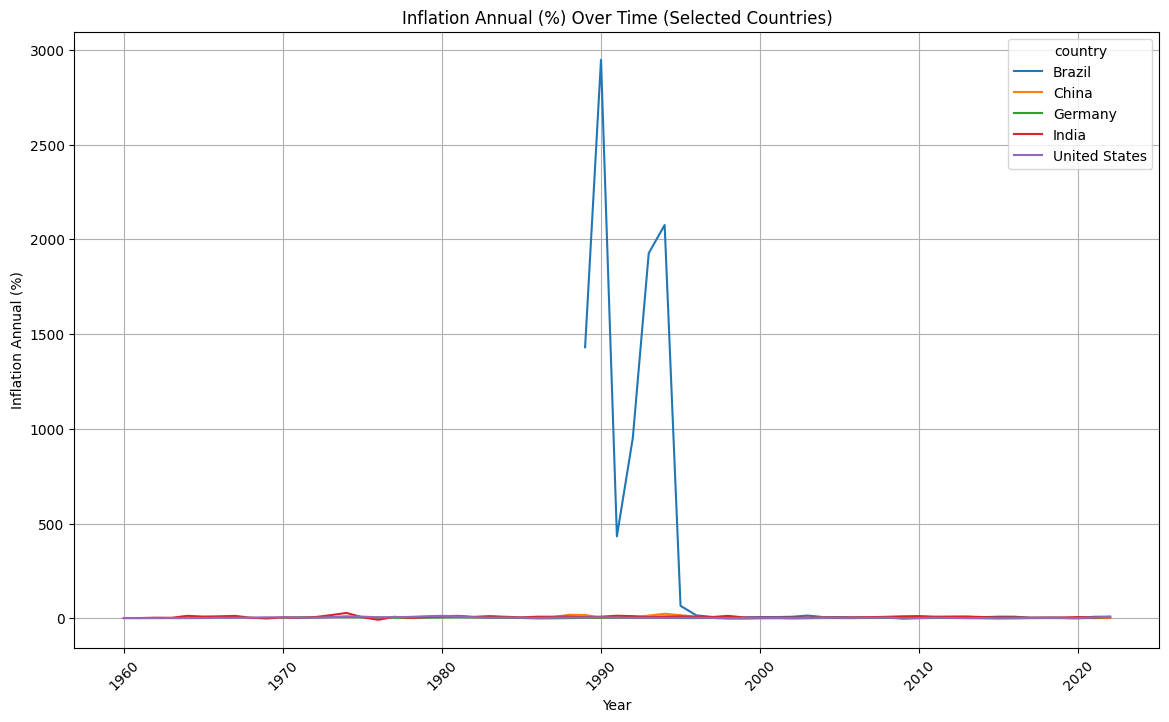

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
file_path = '/Users/ayusharyakashyap/Desktop/Semester 5/Data Visualization/A1 Project/Filtered CSV/world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Converting 'date' column to datetime for time series analysis
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with missing values in necessary columns for this graph
gdp_inflation_data = data[['country', 'date', 'GDP per capita', 'inflation_annual%']].dropna()

# Plotting GDP per capita vs Inflation over time for a few major countries
countries = ['United States', 'India', 'China', 'Germany', 'Brazil']
filtered_data = gdp_inflation_data[gdp_inflation_data['country'].isin(countries)]

# Plot GDP per capita
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='date', y='GDP per capita', hue='country')
plt.title('GDP Per Capita Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot Inflation
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='date', y='inflation_annual%', hue='country')
plt.title('Inflation Annual (%) Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('Inflation Annual (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


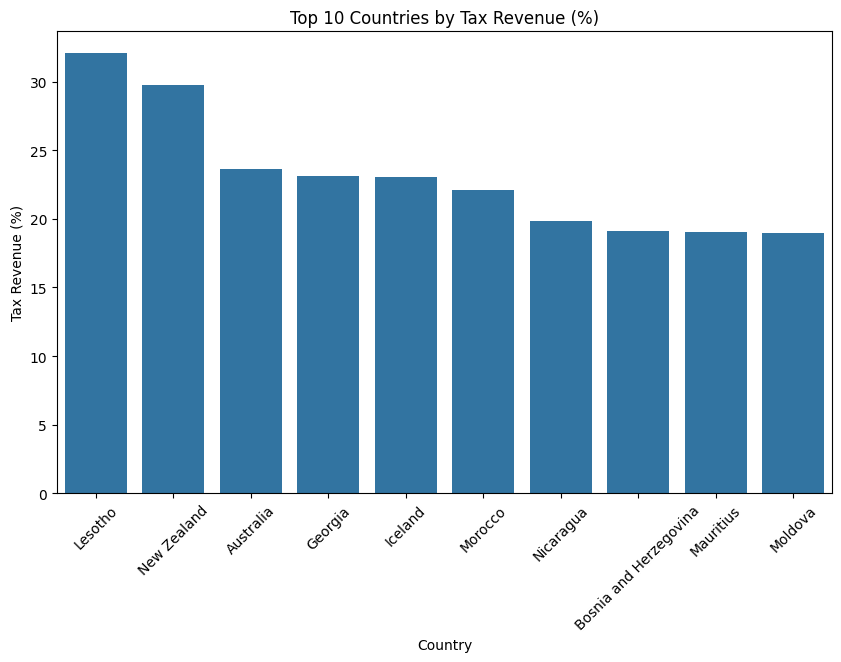

In [31]:
# Drop missing values for tax revenue data
tax_revenue_data = data[['country', 'date', 'tax_revenue%']].dropna()

# Filter by the latest available date (for comparison across countries)
latest_data = tax_revenue_data[tax_revenue_data['date'] == tax_revenue_data['date'].max()]

# Top 10 countries by tax revenue
top_10_countries = latest_data.nlargest(10, 'tax_revenue%')

# Plotting Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='tax_revenue%', data=top_10_countries)
plt.title('Top 10 Countries by Tax Revenue (%)')
plt.xlabel('Country')
plt.ylabel('Tax Revenue (%)')
plt.xticks(rotation=45)
plt.show()


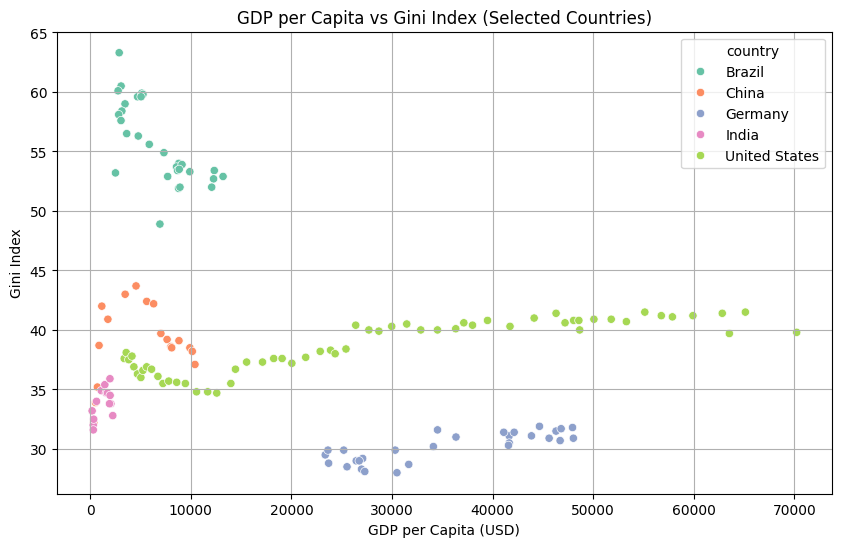

In [33]:
# List of specific countries to filter
countries = ['United States', 'India', 'China', 'Germany', 'Brazil']

# Drop missing values for GDP per capita and Gini index
gdp_gini_data = data[['country', 'GDP per capita', 'gini_index']].dropna()

# Filter the data for the selected countries
filtered_gdp_gini_data = gdp_gini_data[gdp_gini_data['country'].isin(countries)]

# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='gini_index', data=filtered_gdp_gini_data, hue='country', palette='Set2')
plt.title('GDP per Capita vs Gini Index (Selected Countries)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()


In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world shapefile from GeoPandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Example of data: Use GDP per capita (You can modify to use other indicators)
# Ensure the country names are consistent between the dataset and the GeoPandas world map
data_for_map = data[['country', 'GDP per capita']].dropna()

# Rename the country column to match the world GeoDataFrame's 'name' column
data_for_map = data_for_map.rename(columns={'country': 'name'})

# Merge the world GeoDataFrame with your economic dataset
world = world.merge(data_for_map, on='name')

# Plotting the heatmap on the world map based on GDP per capita
plt.figure(figsize=(15, 10))
world.boundary.plot()
world.plot(column='GDP per capita', cmap='YlOrRd', legend=True, legend_kwds={'label': "GDP per Capita (USD)", 'orientation': "horizontal"})
plt.title('World Map Heatmap: GDP per Capita')
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

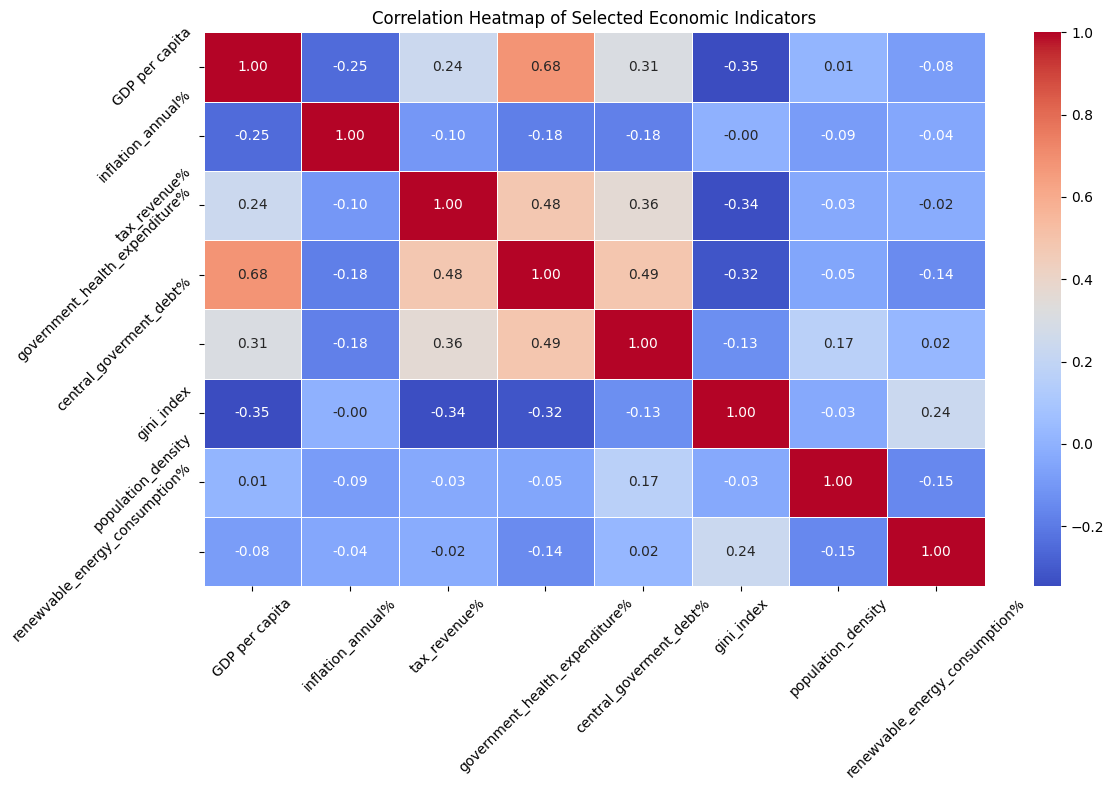

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of relevant economic indicators
selected_columns = ['GDP per capita', 'inflation_annual%', 'tax_revenue%', 'government_health_expenditure%', 
                    'central_goverment_debt%', 'gini_index', 'population_density', 'renewvable_energy_consumption%']

# Drop rows with missing values in the selected columns
heatmap_data = data[selected_columns].dropna()

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Selected Economic Indicators')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


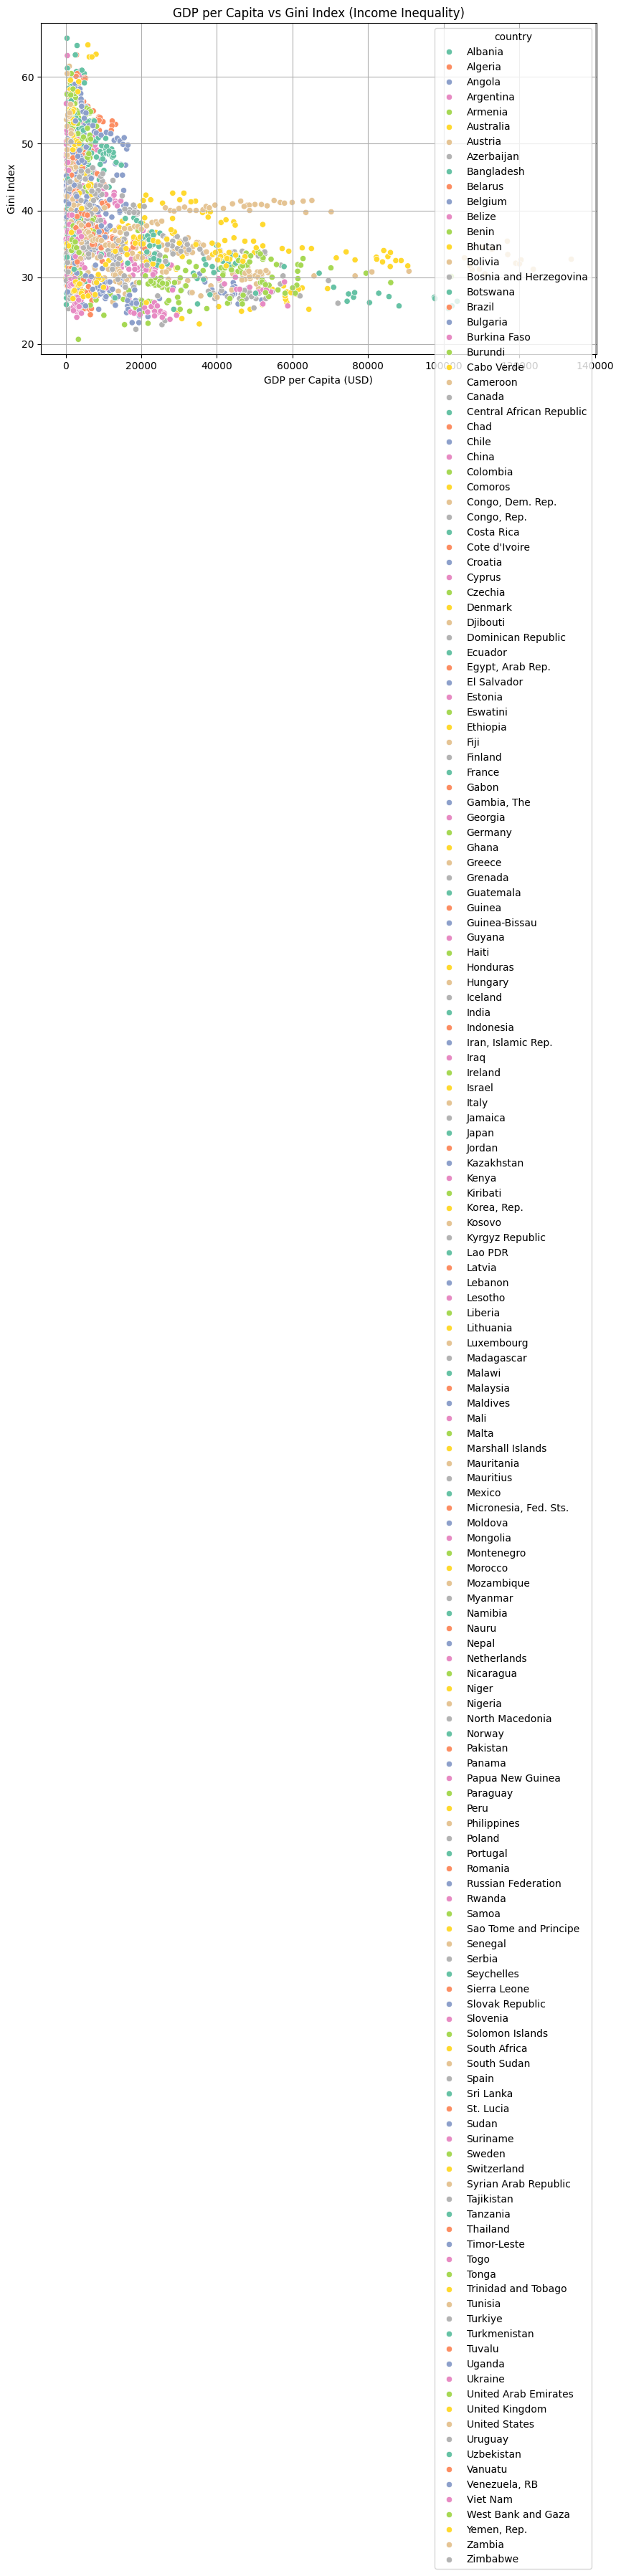

In [32]:
# Drop missing values for GDP per capita and Gini index
gdp_gini_data = data[['country', 'GDP per capita', 'gini_index']].dropna()

# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='gini_index', data=gdp_gini_data, hue='country', palette='Set2')
plt.title('GDP per Capita vs Gini Index (Income Inequality)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()
